In [ ]:

pip install tensorflow

In [ ]:
pip install keras

In [ ]:
pip install h5py

In [4]:
import tkinter as tk
from tkinter import ttk ## This is fancy version of tkinter
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow

tensorflow.__version__
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Flatten,Dropout, BatchNormalization
from keras.models import model_from_json
from keras import optimizers
from keras.callbacks import EarlyStopping
import pickle
from tensorflow.keras.utils import to_categorical

In [5]:
#Used for Styling
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Data Analysis and Visualization

In [6]:
Data=pd.read_csv('signal.csv')
Data.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Five Point Summary

print("Five Point Summary::")
print("\n")
Data.describe().T[['min', '25%', '50%', '75%', 'max']]

Five Point Summary::




min      25%       50%        75%        max
Parameter 1      4.60000   7.1000   7.90000   9.200000   15.90000
Parameter 2      0.12000   0.3900   0.52000   0.640000    1.58000
Parameter 3      0.00000   0.0900   0.26000   0.420000    1.00000
Parameter 4      0.90000   1.9000   2.20000   2.600000   15.50000
Parameter 5      0.01200   0.0700   0.07900   0.090000    0.61100
Parameter 6      1.00000   7.0000  14.00000  21.000000   72.00000
Parameter 7      6.00000  22.0000  38.00000  62.000000  289.00000
Parameter 8      0.99007   0.9956   0.99675   0.997835    1.00369
Parameter 9      2.74000   3.2100   3.31000   3.400000    4.01000
Parameter 10     0.33000   0.5500   0.62000   0.730000    2.00000
Parameter 11     8.40000   9.5000  10.20000  11.100000   14.90000
Signal_Strength  3.00000   5.0000   6.00000   6.000000    8.00000

In [9]:
# Check for  Null  Values
print(color.UNDERLINE+'Checking if any columns are null :::'+color.END)
print(Data.isnull().values.any())
print('\n')
print(color.UNDERLINE+'Total null values:::'+color.END)
print(Data.isnull().sum().sum())

Checking if any columns are null :::
False


Total null values:::
0


In [10]:
#Check for Duplicate values
dupes = Data.duplicated()
print(color.UNDERLINE+color.BOLD+'Duplicates in the DataSet::'+color.END,sum(dupes))
Data[Data.duplicated()]

Duplicates in the DataSet:: 240


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0      0.99780         3.51          0.56   
11           17.0        102.0      0.99780         3.35          0.80   
27           10.0         37.0      0.99660         3.17          0.91   
40           12.0         87.0      0.99780         3.33          0.83   
65            4.0         11.0      0.99620         3.41          0.39   
...           ...          ...          ...          ...           ...   
1563         12.0         20.0      0.99546         3.29          0.54   
1564         12.0         20.0      0.99546         3.29          0.54   
1567         12.0         20.0      0.99546         3.29          0.54   
1581         24.0         32.0      0.99402         3.54          0.60   
1596         29.0         40.0      0.99574         3.42          0.75   

      Parameter 11  Signal_Strength  
4              9.4                5  
11            10.5                5  
27             9.5                5  
40            10.5                5  
65            10.9                5  
...            ...              ...  
1563          10.1                5  
1564          10.1                5  
1567          10.1                5  
1581          11.3                5  
1596          11.0                6  

[240 rows x 12 columns]

Outliers in the DataSet::


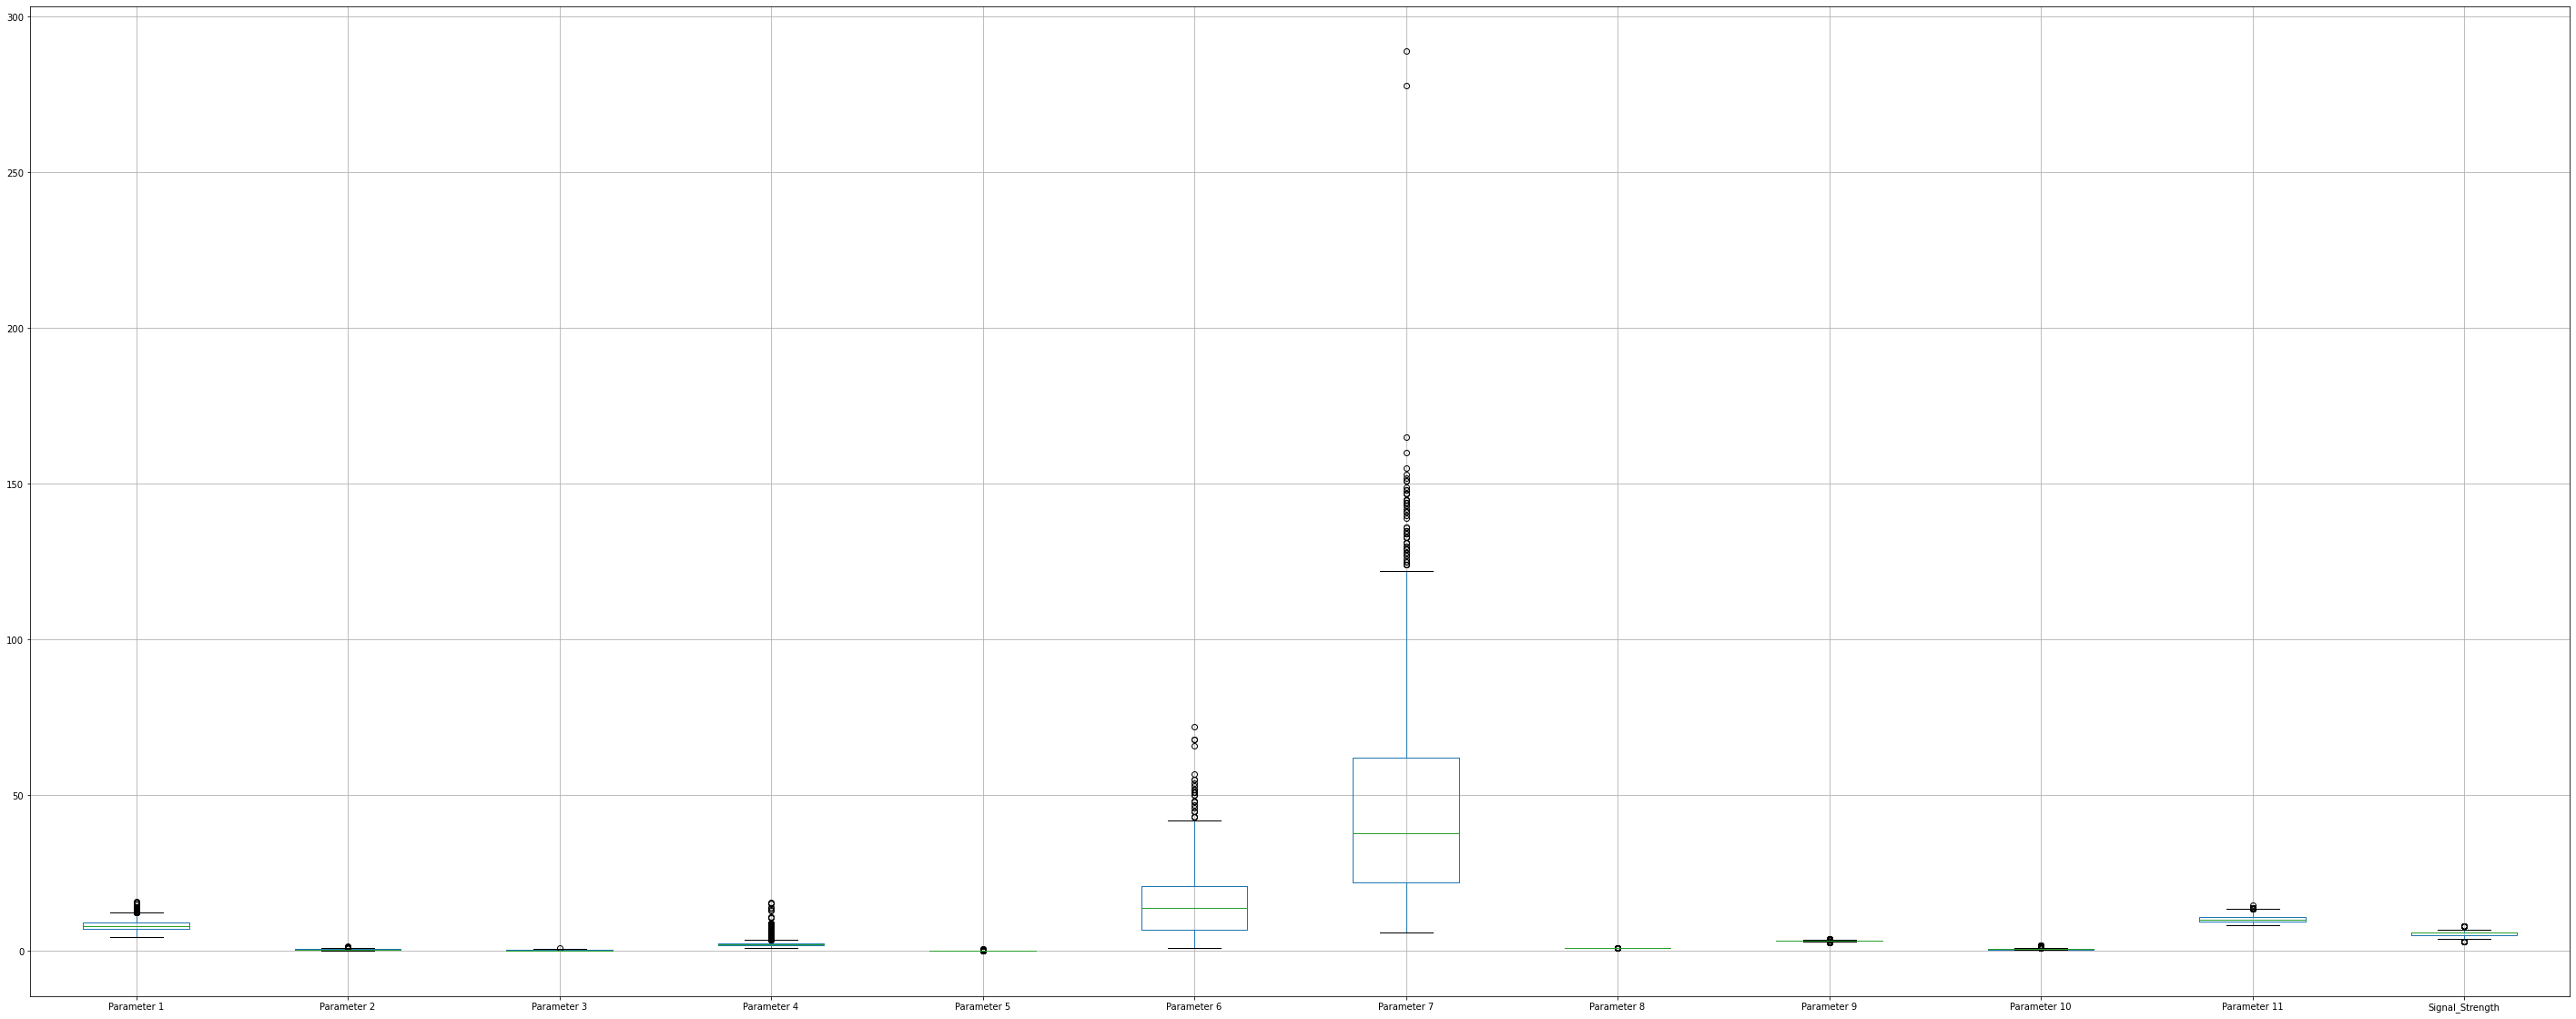

In [11]:
#Check for Outliers
print(color.UNDERLINE+color.BOLD+'Outliers in the DataSet::'+color.END)
Data.boxplot(return_type='axes',figsize=(50,20))

##### We are going to drop these duplicates & Outliers before model building

### Univariate & Multivariate  Analysis 

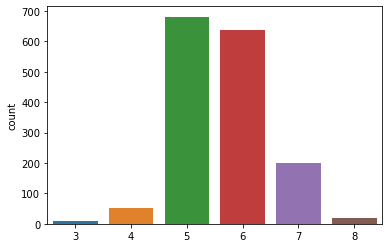

In [12]:
sns.countplot(Data['Signal_Strength'].values)

In [13]:
Data.corr()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  \
Parameter 1         1.000000    -0.256131     0.671703     0.114777   
Parameter 2        -0.256131     1.000000    -0.552496     0.001918   
Parameter 3         0.671703    -0.552496     1.000000     0.143577   
Parameter 4         0.114777     0.001918     0.143577     1.000000   
Parameter 5         0.093705     0.061298     0.203823     0.055610   
Parameter 6        -0.153794    -0.010504    -0.060978     0.187049   
Parameter 7        -0.113181     0.076470     0.035533     0.203028   
Parameter 8         0.668047     0.022026     0.364947     0.355283   
Parameter 9        -0.682978     0.234937    -0.541904    -0.085652   
Parameter 10        0.183006    -0.260987     0.312770     0.005527   
Parameter 11       -0.061668    -0.202288     0.109903     0.042075   
Signal_Strength     0.124052    -0.390558     0.226373     0.013732   

                 Parameter 5  Parameter 6  Parameter 7  Parameter 8  \
Parameter 1         0.093705    -0.153794    -0.113181     0.668047   
Parameter 2         0.061298    -0.010504     0.076470     0.022026   
Parameter 3         0.203823    -0.060978     0.035533     0.364947   
Parameter 4         0.055610     0.187049     0.203028     0.355283   
Parameter 5         1.000000     0.005562     0.047400     0.200632   
Parameter 6         0.005562     1.000000     0.667666    -0.021946   
Parameter 7         0.047400     0.667666     1.000000     0.071269   
Parameter 8         0.200632    -0.021946     0.071269     1.000000   
Parameter 9        -0.265026     0.070377    -0.066495    -0.341699   
Parameter 10        0.371260     0.051658     0.042947     0.148506   
Parameter 11       -0.221141    -0.069408    -0.205654    -0.496180   
Signal_Strength    -0.128907    -0.050656    -0.185100    -0.174919   

                 Parameter 9  Parameter 10  Parameter 11  Signal_Strength  
Parameter 1        -0.682978      0.183006     -0.061668         0.124052  
Parameter 2         0.234937     -0.260987     -0.202288        -0.390558  
Parameter 3        -0.541904      0.312770      0.109903         0.226373  
Parameter 4        -0.085652      0.005527      0.042075         0.013732  
Parameter 5        -0.265026      0.371260     -0.221141        -0.128907  
Parameter 6         0.070377      0.051658     -0.069408        -0.050656  
Parameter 7        -0.066495      0.042947     -0.205654        -0.185100  
Parameter 8        -0.341699      0.148506     -0.496180        -0.174919  
Parameter 9         1.000000     -0.196648      0.205633        -0.057731  
Parameter 10       -0.196648      1.000000      0.093595         0.251397  
Parameter 11        0.205633      0.093595      1.000000         0.476166  
Signal_Strength    -0.057731      0.251397      0.476166         1.000000

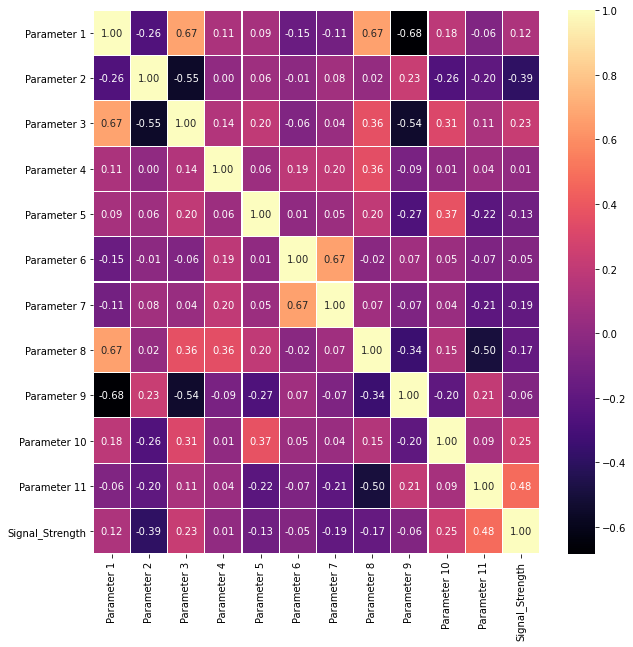

In [14]:
# Correlation between attributes
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(Data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

##### We can see no two attributes are strongly correlated

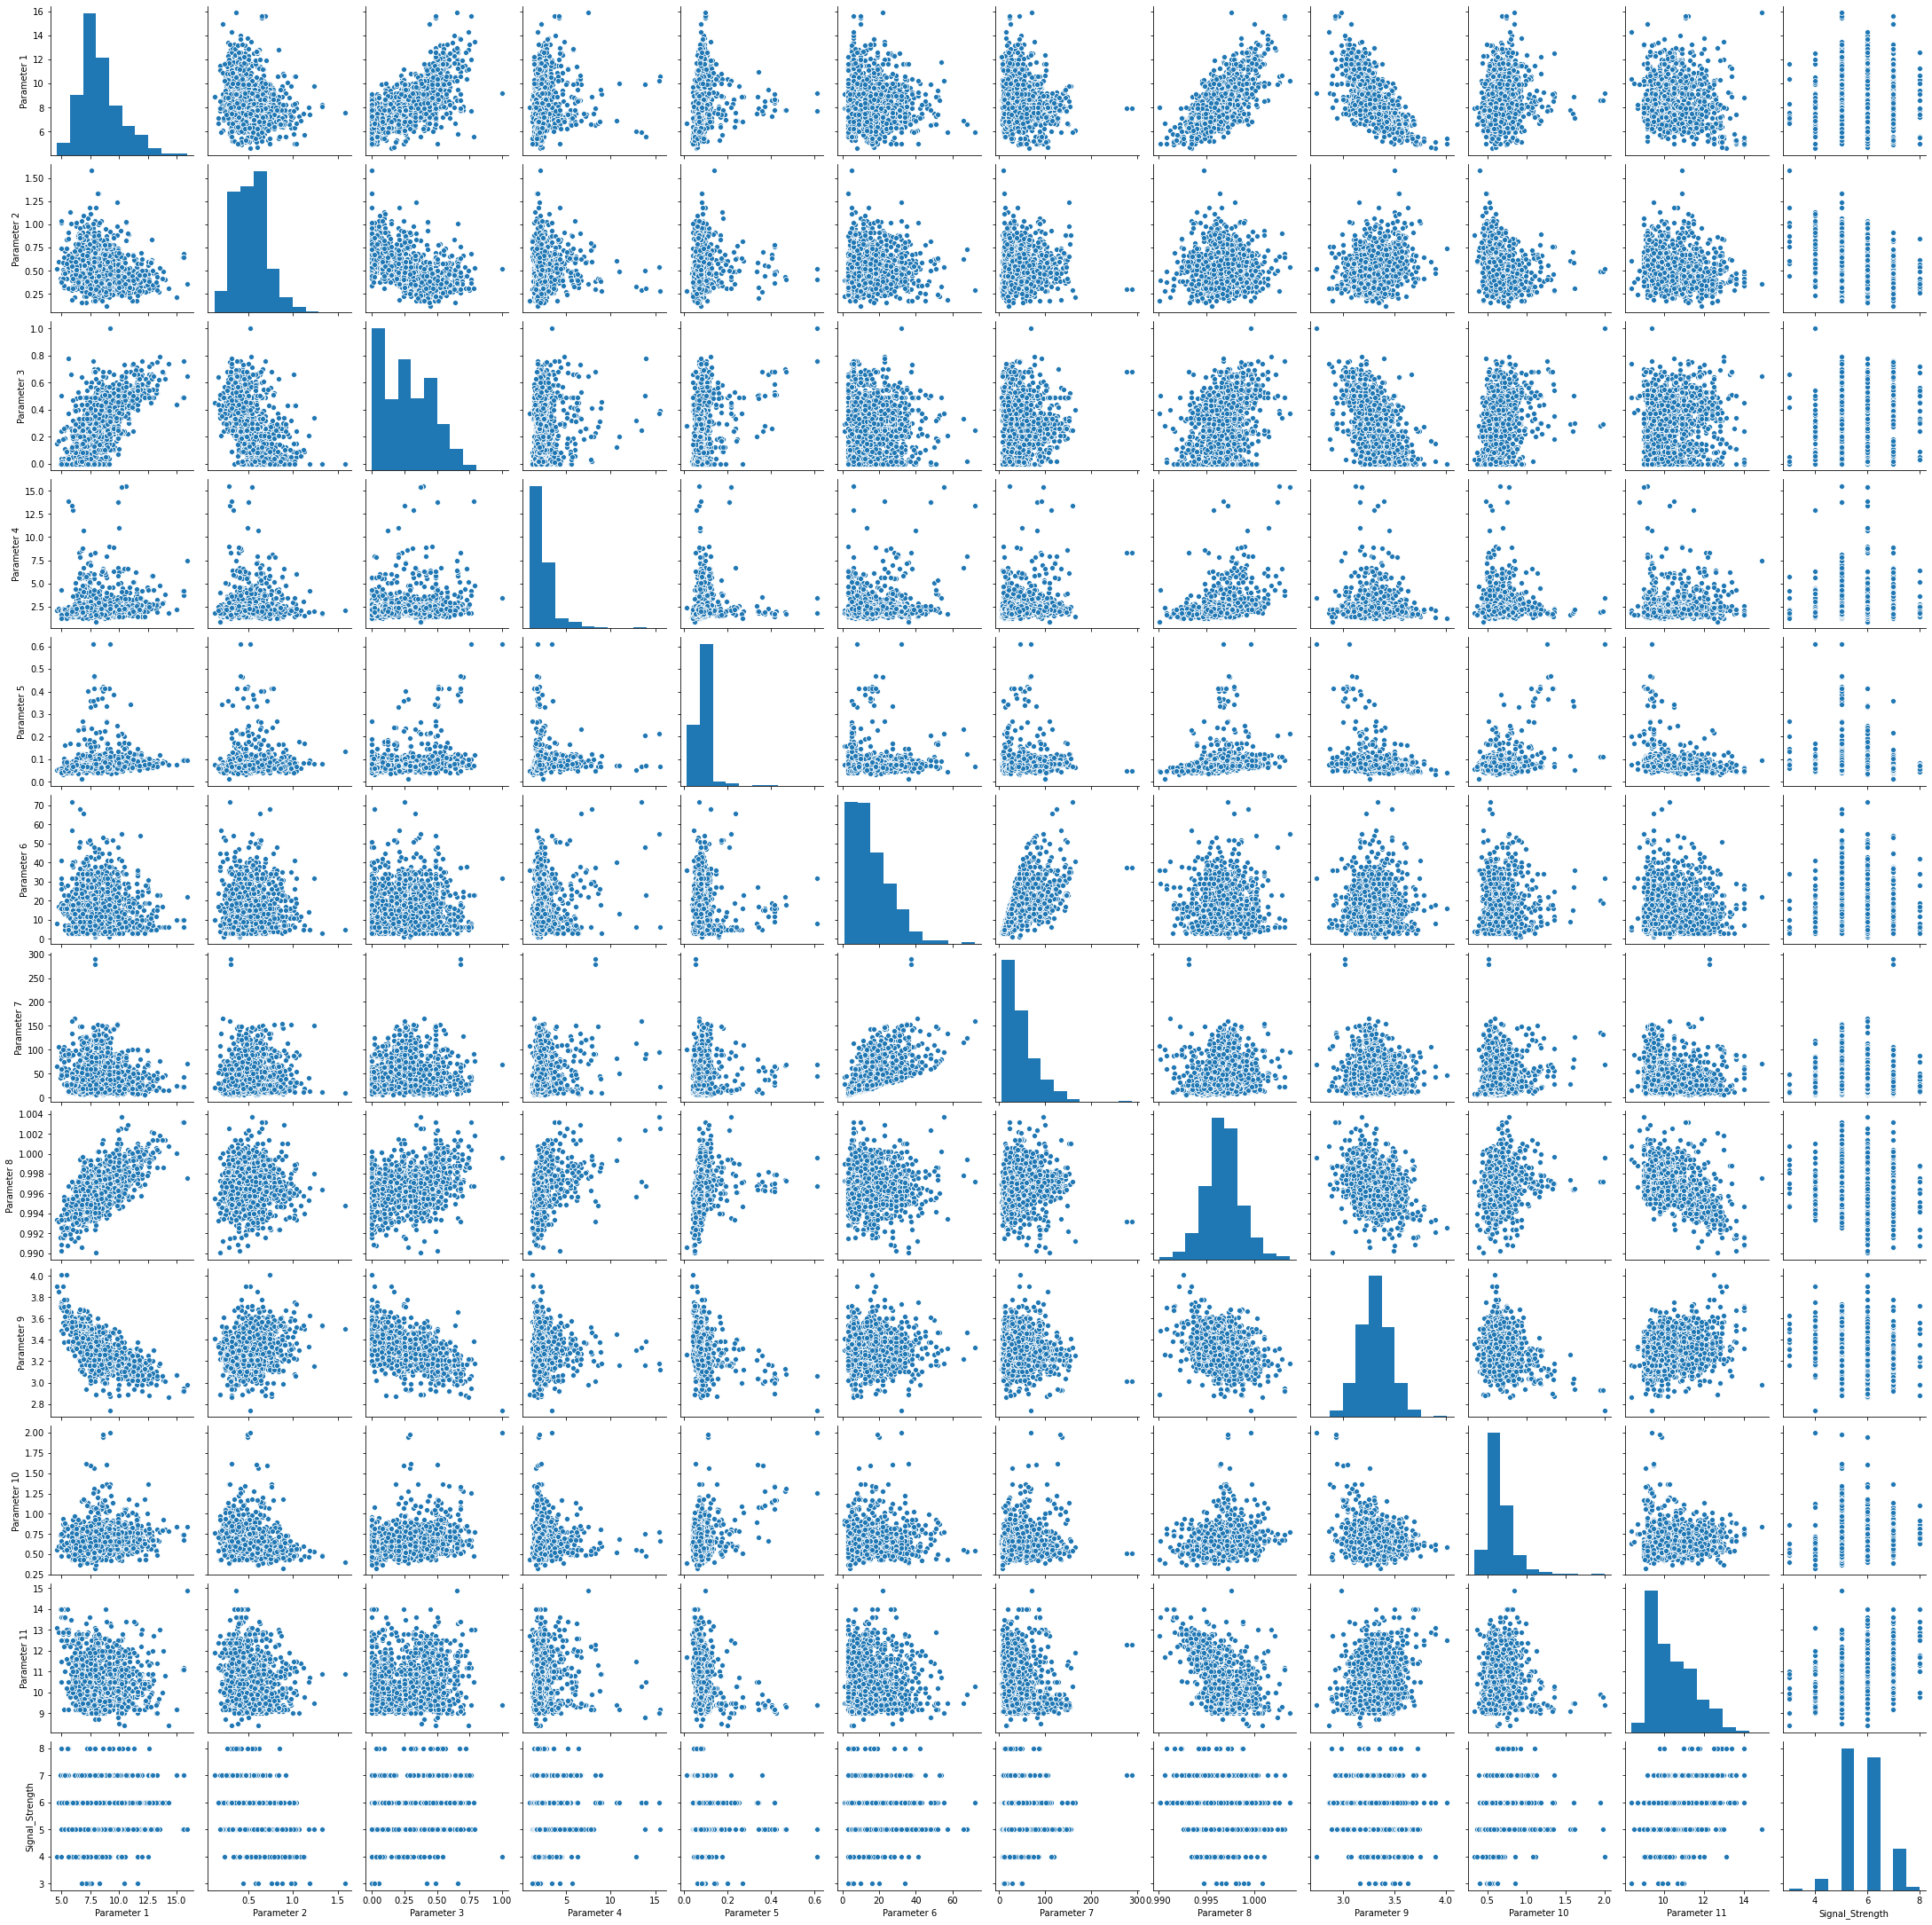

In [15]:
sns.pairplot(Data)
plt.show()

### Clean Data

In [16]:
def data_clean(Data):
    dupes = Data.duplicated()
    Data_clean= Data.copy()
    for (columnName, columnData) in Data_clean.iteritems(): 
        Q1 = Data_clean[columnName].quantile(0.25)
        Q3 = Data_clean[columnName].quantile(0.75)
        IQR = Q3 - Q1
        for i in np.where(Data_clean[columnName] > Q3 + 1.5 * IQR):
            Data_clean[columnName].iloc[i] = Q3 + 1.5 * IQR
        ## Delete the Duplicate values
    Data_clean=Data_clean.drop_duplicates(keep="first")
    return Data_clean
    

In [17]:
Data_clean=data_clean(Data)
dupes = Data.duplicated()
print('Duplicates in the DataSet BEFORE::',sum(dupes))
dupes1 = Data_clean.duplicated()
print('Duplicates in the DataSet After::',sum(dupes1))

Duplicates in the DataSet BEFORE:: 240
Duplicates in the DataSet After:: 0


F:\PGP-AIML\Python_Projects\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Outliers in the DataSet::


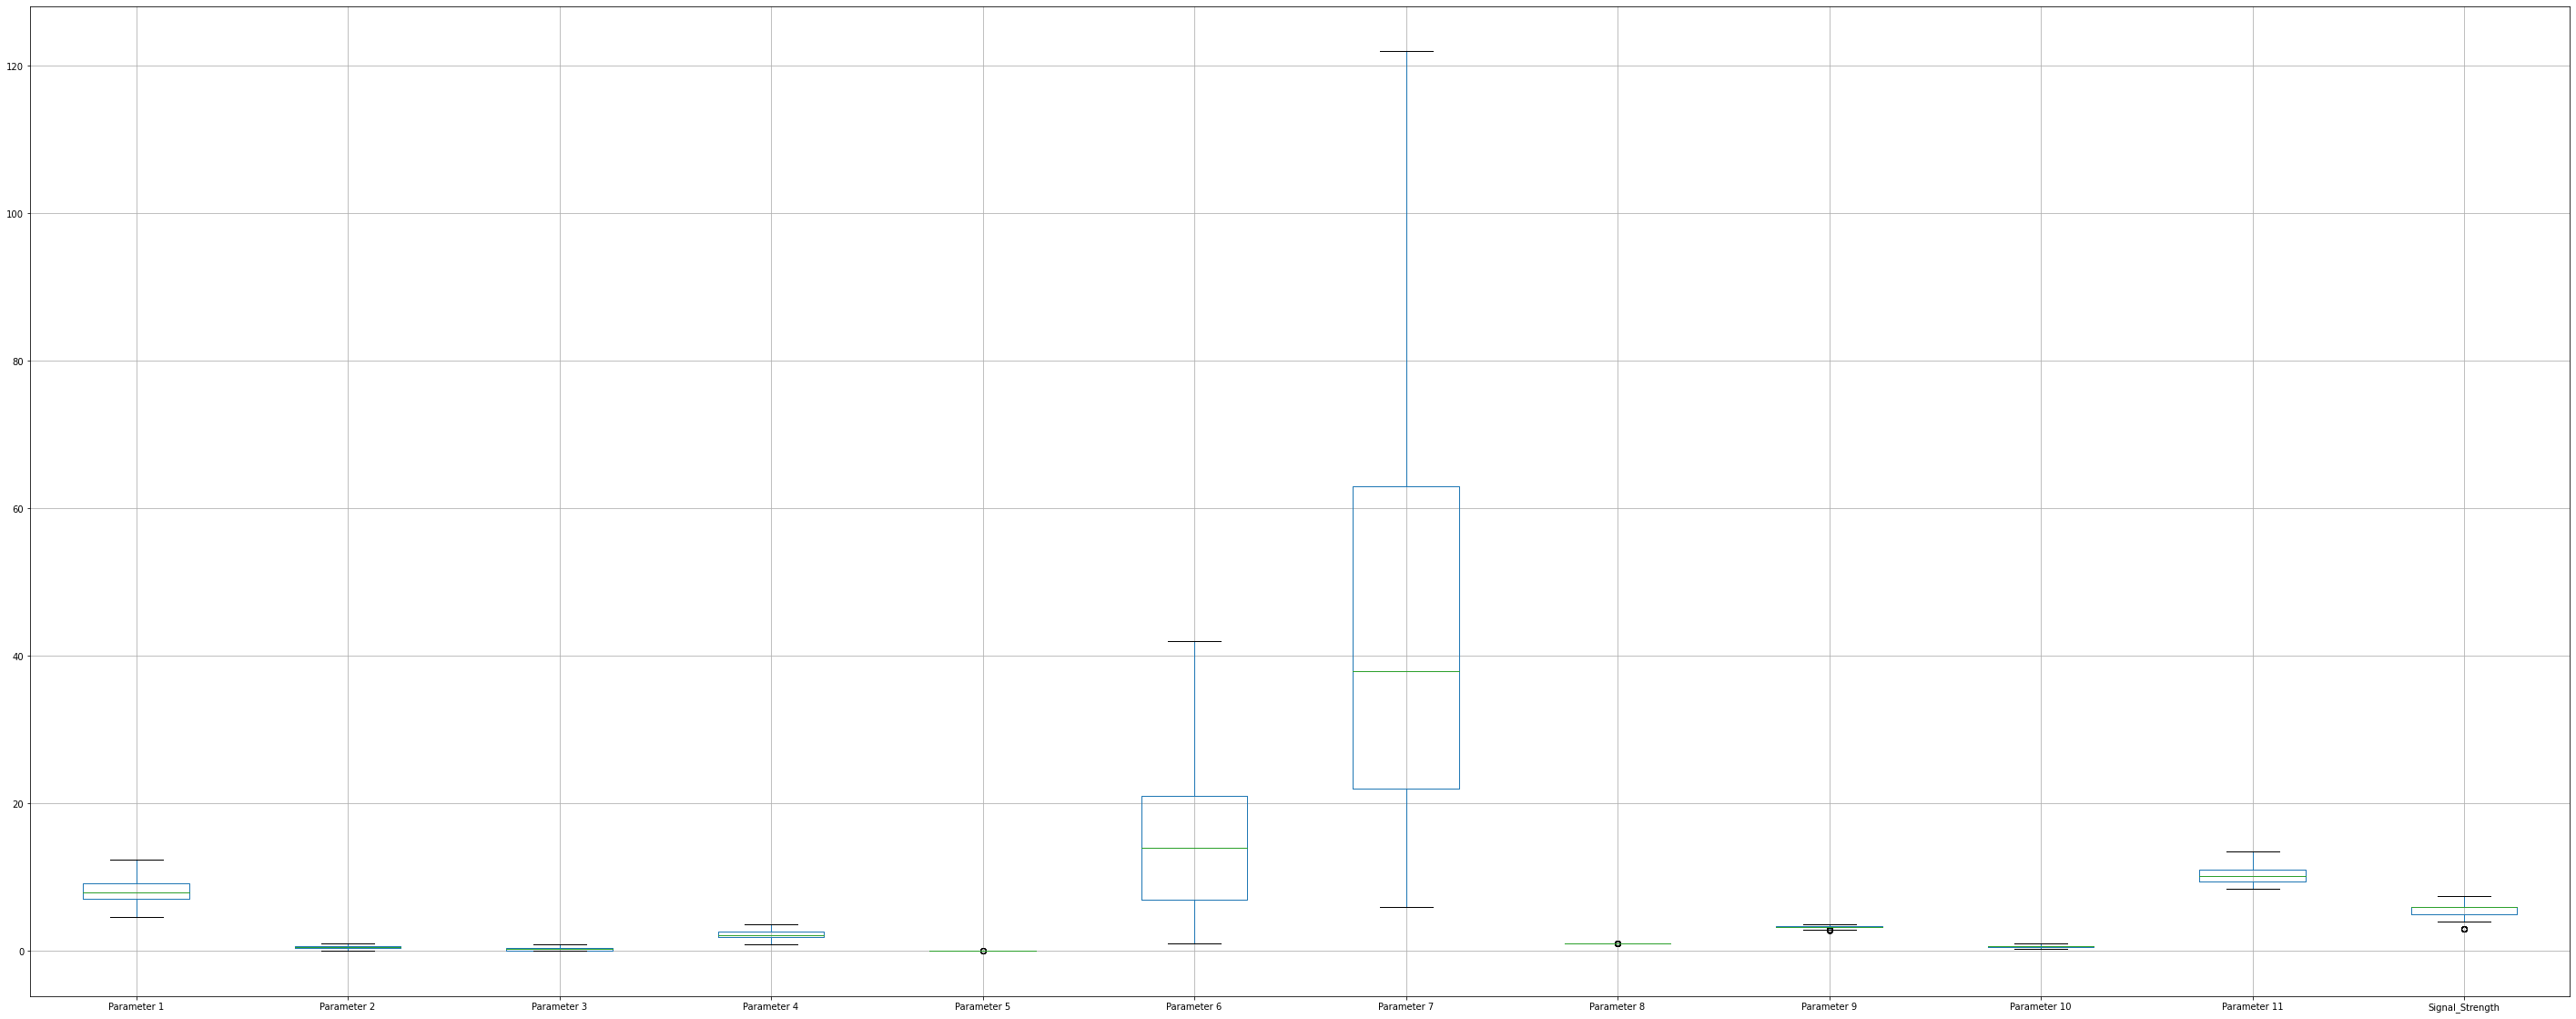

In [18]:
## After Data Clean Outliers
print(color.UNDERLINE+color.BOLD+'Outliers in the DataSet::'+color.END)
Data_clean.boxplot(return_type='axes',figsize=(50,20))

# Regression

### Train the model

In [19]:
X = Data_clean.drop(['Signal_Strength'],axis=1)     # Predictor feature columns (8 X m)
Y = np.array(Data_clean['Signal_Strength']) 
print(X.shape)
print(Y.shape)

(1356, 11)
(1356,)


In [20]:
Y[0]

5.0

In [21]:
#Split the data & Normalize the data
x_trainval, x_test, y_trainval, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.6, random_state=1)

In [22]:
y_train

array([6. , 5. , 5. , 6. , 6. , 5. , 5. , 6. , 7. , 6. , 5. , 4. , 6. ,
       5. , 6. , 7. , 5. , 6. , 6. , 6. , 6. , 5. , 5. , 7. , 7. , 5. ,
       5. , 5. , 6. , 7. , 5. , 5. , 7. , 5. , 6. , 7. , 5. , 6. , 5. ,
       6. , 6. , 5. , 5. , 5. , 6. , 5. , 5. , 6. , 7. , 7. , 5. , 6. ,
       6. , 6. , 6. , 4. , 6. , 6. , 5. , 6. , 5. , 5. , 6. , 7. , 5. ,
       5. , 6. , 7. , 5. , 5. , 6. , 4. , 5. , 5. , 5. , 6. , 5. , 5. ,
       7. , 7. , 6. , 5. , 5. , 6. , 6. , 5. , 5. , 5. , 6. , 7. , 6. ,
       5. , 5. , 5. , 6. , 7.5, 5. , 7. , 5. , 6. , 5. , 6. , 5. , 4. ,
       5. , 6. , 7. , 6. , 6. , 5. , 6. , 5. , 4. , 6. , 5. , 6. , 5. ,
       7. , 6. , 6. , 7. , 6. , 5. , 6. , 7.5, 6. , 4. , 5. , 5. , 6. ,
       7. , 5. , 6. , 5. , 6. , 6. , 6. , 6. , 5. , 6. , 5. , 5. , 5. ,
       3. , 5. , 5. , 6. , 5. , 7. , 7. , 6. , 5. , 5. , 5. , 5. , 5. ,
       5. , 6. , 6. , 7. , 6. , 5. , 7. , 5. , 5. , 6. , 5. , 6. , 6. ,
       5. , 6. , 5. , 4. , 6. , 5. , 5. , 6. , 7. , 6. , 5. , 6.

### Normalize the Data

In [23]:

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(x_train.shape)
print(scaler_x.fit(x_train))
x_train_scale=scaler_x.transform(x_train)
print(x_train_scale.shape)
print(x_val.shape)
print(scaler_x.fit(x_val))
x_val_scale=scaler_x.transform(x_val)
print(x_val_scale.shape)





(379, 11)
MinMaxScaler()
(379, 11)
(570, 11)
MinMaxScaler()
(570, 11)


In [24]:
model=tensorflow.keras.models.Sequential()

## Here For Fully connected neural network using three layers
First Layer Input Layer - 11 (columns in train)

Hidden layer - Average of input+output neurons i.e,,- 6 neurons

Output Layer -1 neuron

Activation Function using : Relu

Optimizer - comparing stochastic & adam

In [25]:
y_val.shape

(570,)

In [26]:
#Layer1 - Input Layer
##model.add(Flatten())
##tensorflow.keras.layers.BatchNormalization(input_shape=(11,))
model.add(Dense(11, activation='linear', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1))

### Compile & Fit The Model

In [58]:
learning_rate=0.09
#sgd = optimizers.Adam(lr=learning_rate, decay=1e-6, momentum=0.6)
sgd = optimizers.Adam(lr=learning_rate)

In [59]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model.compile(optimizer=sgd, loss='mse',metrics=['mse','mae','accuracy'])

In [70]:
# Fit The Model
earlystop = EarlyStopping(monitor = 'accuracy',min_delta = 0.01,patience = 4, verbose = 1,restore_best_weights = True)
model.fit(x_train_scale, y_train,           
          validation_data=(x_val_scale,y_val),
          epochs=10,
          batch_size=60000,callbacks=earlystop)

Epoch 1/10
1/1 [==============================] - 0s 150ms/step - loss: 0.5706 - mse: 0.5706 - mae: 0.5936 - accuracy: 0.0000e+00 - val_loss: 0.5268 - val_mse: 0.5268 - val_mae: 0.5955 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 60ms/step - loss: 0.4736 - mse: 0.4736 - mae: 0.5319 - accuracy: 0.0000e+00 - val_loss: 0.5836 - val_mse: 0.5836 - val_mae: 0.6063 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 61ms/step - loss: 0.7401 - mse: 0.7401 - mae: 0.6886 - accuracy: 0.0000e+00 - val_loss: 0.5820 - val_mse: 0.5820 - val_mae: 0.6052 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 65ms/step - loss: 0.7385 - mse: 0.7385 - mae: 0.6736 - accuracy: 0.0000e+00 - val_loss: 0.5400 - val_mse: 0.5400 - val_mae: 0.6014 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 62ms/step - loss: 0.4832 - mse: 0.4832 - mae: 0.5536 - accuracy: 0.0000e+00 - val_loss: 0.6048 - val_m

As we are scaling the data after the split. If we do it before Train & Test Data Split there will be Data leak when dealing with test data



In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dropout (Dropout)            (None, 11)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 255
Trainable params: 233
Non-trainable params: 22
_________________________________________________________________


In [74]:
#Accuracy of the Validation data
print('MSE of model ::'+str(model.evaluate(x_val_scale,y_val)[2]))

18/18 [==============================] - 0s 1ms/step - loss: 0.5268 - mse: 0.5268 - mae: 0.5955 - accuracy: 0.0000e+00
MSE of model ::0.5955436825752258


In [75]:
scores = model.evaluate(x_val_scale, y_val, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[2], scores[1]*100))

18/18 [==============================] - 0s 2ms/step - loss: 0.5268 - mse: 0.5268 - mae: 0.5955 - accuracy: 0.0000e+00
mae: 52.68%


## Pickle the model i.e,, saving the model so that it can be deployed and used for production data

In [76]:
model_json = model.to_json()
with open("NeuralNetworkRegressionAssign_Part1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("NeuralNetworkRegressionAssign_Part1.h5")
print("Saved model to disk")

Saved model to disk


### Load the above saved Model and evaluate on test data

In [77]:
# load json and create model
json_file = open('NeuralNetworkRegressionAssign_Part1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("NeuralNetworkRegressionAssign_Part1.h5")
print("Loaded model from disk")
 
scaler_y = MinMaxScaler()
scaler_x.fit(x_test)
x_test_scale=scaler_x.transform(x_test)
# evaluate loaded model on test data
loaded_model.compile(optimizer='adam', loss='mse',metrics=['mse','mae','accuracy'])
score = loaded_model.evaluate(x_test_scale, y_test, verbose=0)
print(score)

Loaded model from disk
[0.5184648036956787, 0.5184648036956787, 0.5926212668418884, 0.0]


# Classification

In [78]:
X_class = Data_clean.drop(['Signal_Strength'],axis=1)    
Y_class = np.array(Data_clean['Signal_Strength']) 
print(X_class.shape)
print(Y_class.shape)

(1356, 11)
(1356,)


In [79]:
#Split the data & Normalize the data
x_trainval_class, x_test_class, y_trainval_class, y_test_class = train_test_split(X_class, Y_class, test_size=0.3, random_state=1)
x_train_class, x_val_class, y_train_class, y_val_class = train_test_split(x_trainval_class, y_trainval_class, test_size=0.6, random_state=1)

In [80]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(x_train_class.shape)
print(scaler_x.fit(x_train_class))
x_train_class_scale=scaler_x.transform(x_train_class)
print(x_train_class_scale.shape)
print(x_val_class.shape)
print(scaler_x.fit(x_val_class))
x_val_class_scale=scaler_x.transform(x_val_class)
print(x_val_class_scale.shape)

(379, 11)
MinMaxScaler()
(379, 11)
(570, 11)
MinMaxScaler()
(570, 11)


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 8 (Max value of the target field is 8)
- we are doing this to use categorical_crossentropy as loss

In [81]:

y_train_class = to_categorical(y_train_class, num_classes=8)
y_val_class = to_categorical(y_val_class, num_classes=8)
y_test_class = to_categorical(y_test_class, num_classes=8)

print("Shape of y_train:", y_train_class.shape)
print("One value of y_train:", y_train_class[0])

Shape of y_train: (379, 8)
One value of y_train: [0. 0. 0. 0. 0. 0. 1. 0.]


In [82]:

print("Shape of y_train:", y_val_class.shape)
print("One value of y_train:", y_val_class[0])

Shape of y_train: (570, 8)
One value of y_train: [0. 0. 0. 0. 0. 0. 1. 0.]


In [118]:
model_class1=tensorflow.keras.models.Sequential()

In [119]:
model_class1.add(Dense(11, activation='linear', kernel_initializer='uniform'))
model_class1.add(Dense(6, activation='relu', kernel_initializer='uniform'))
model_class1.add(Dense(8,activation="softmax"))

In [120]:
learning_rate=0.01
sgd = optimizers.Adam(lr=learning_rate)

#sgd = optimizers.Adam(lr=learning_rate, decay=1e-6, momentum=0.6)

In [121]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_class1.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

In [122]:
earlystop = EarlyStopping(monitor = 'accuracy',min_delta = 0.001,patience = 3, verbose = 1,restore_best_weights = True)
model_class1.fit(x_train_class_scale, y_train_class,           
          validation_data=(x_val_class_scale,y_val_class),
          epochs=70,
          batch_size=60000,callbacks=earlystop)

Epoch 1/70
1/1 [==============================] - 1s 925ms/step - loss: 2.0786 - accuracy: 0.2612 - val_loss: 2.0546 - val_accuracy: 0.4333
Epoch 2/70
1/1 [==============================] - 0s 65ms/step - loss: 2.0546 - accuracy: 0.4459 - val_loss: 2.0231 - val_accuracy: 0.4333
Epoch 3/70
1/1 [==============================] - 0s 58ms/step - loss: 2.0235 - accuracy: 0.4459 - val_loss: 1.9847 - val_accuracy: 0.4333
Epoch 4/70
1/1 [==============================] - 0s 57ms/step - loss: 1.9859 - accuracy: 0.4459 - val_loss: 1.9379 - val_accuracy: 0.4333
Epoch 5/70
1/1 [==============================] - 0s 59ms/step - loss: 1.9401 - accuracy: 0.4459 - val_loss: 1.8819 - val_accuracy: 0.4333
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping


In [135]:
model_class1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 56        
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [134]:
scores = model_class1.evaluate(x_val_class_scale, y_val_class, verbose=1)
print("%s: %.2f%%" % (model_class.metrics_names[1], scores[1]*100))

18/18 [==============================] - 0s 1ms/step - loss: 2.0231 - accuracy: 0.4333
accuracy: 43.33%


In [133]:
model_class1.evaluate(x_train_class_scale, y_train_class)

12/12 [==============================] - 0s 1ms/step - loss: 2.0235 - accuracy: 0.4459


[2.0235440731048584, 0.4459103047847748]

In [141]:
#Evaluate on test data
scaler_y = MinMaxScaler()
scaler_x.fit(x_test)
x_test_class_scale=scaler_x.transform(x_test_class)
model_class1.evaluate(x_test_class_scale, y_test_class)

13/13 [==============================] - 0s 1ms/step - loss: 2.0243 - accuracy: 0.3931


[2.024327039718628, 0.3931203782558441]

## Pickle the model i.e,, saving the model so that it can be deployed and used for production data

In [136]:
modelclass_json = model_class1.to_json()
with open("NeuralNetworkClassificationAssign_Part2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_class1.save_weights("NeuralNetworkClassificationAssign_Part2.h5")
print("Saved model to disk")

Saved model to disk
